1- Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

# Verify the columns in the DataFrame after loading the dataset
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Exploring the Data

In [3]:
# أول 5 صفوف
print(df.head())

# معلومات عن الأعمدة وأنواعها والقيم المفقودة
print(df.info())

# إحصائيات عامة
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
# التحقق من القيم المفقوده
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


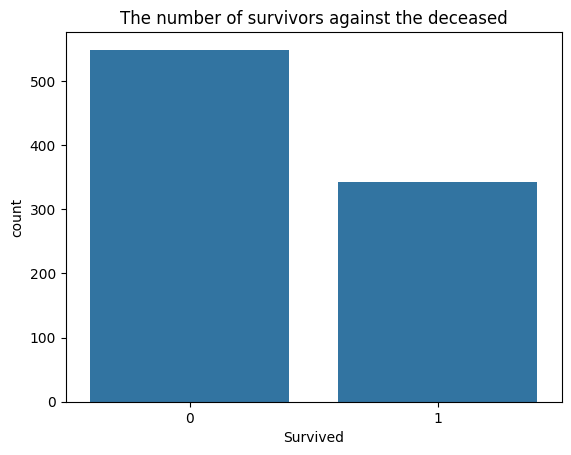

In [5]:
#شكل بياني بسيط لعدد الناجين مقابل اللي ماتوا
sns.countplot(x='Survived', data=df)
plt.title('The number of survivors against the deceased')
plt.show()

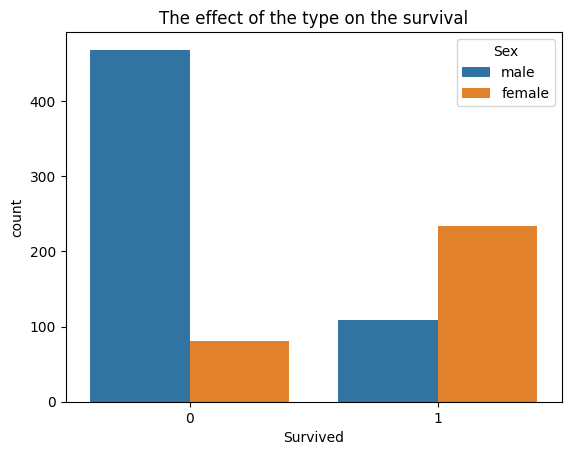

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=df)
#تأثير النوع على النجاة
plt.title('The effect of the type on the survival')
plt.show()

In [7]:
#حساب نسب النجاة لكل نوع (ذكر وأنثى) كنسبة مئوية
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_gender)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


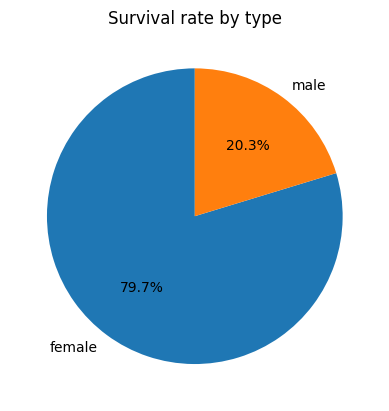

In [8]:
survival_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Survival rate by type')
plt.ylabel('')
plt.show()

In [9]:
#Missing Values

#Cabin
df.drop('Cabin', axis=1, inplace=True)

#Age   الأفضل نحط المتوسط أو الوسيط بدل القيم المفقودة لانه مهم
df['Age'] = df['Age'].fillna(df['Age'].median())

#Embarked  عمود صغير وفيه missing values قليلة (مثلاً 2).
#نحط أكتر قيمة مكررة فيه 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [11]:
# معالجة القيم المفقودة

#Age   الأفضل نحط المتوسط أو الوسيط بدل القيم المفقودة لانه مهم
df['Age'] = df['Age'].fillna(df['Age'].median())

#Embarked  عمود صغير وفيه missing values قليلة (مثلاً 2).
#نحط أكتر قيمة مكررة فيه 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# طباعة عدد القيم المفقودة بعد المعالجة للتأكد
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


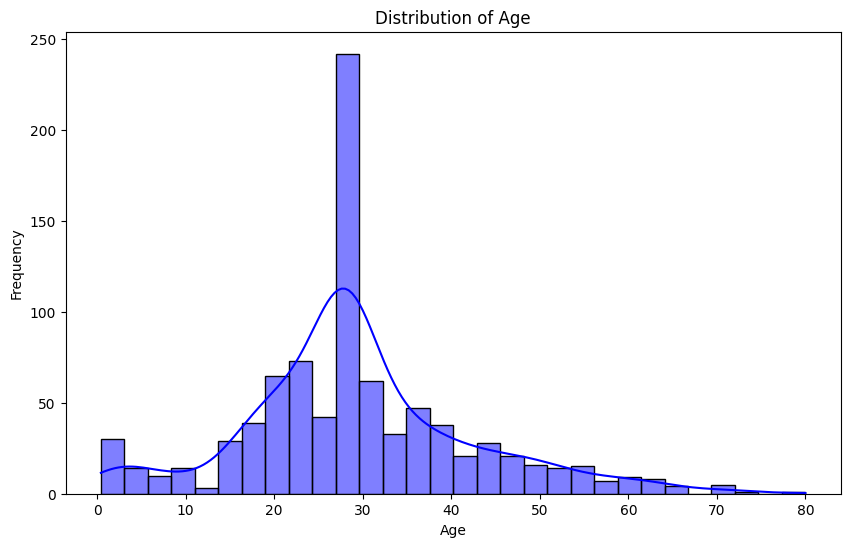

In [12]:
#  توزيع البيانات للعمود Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

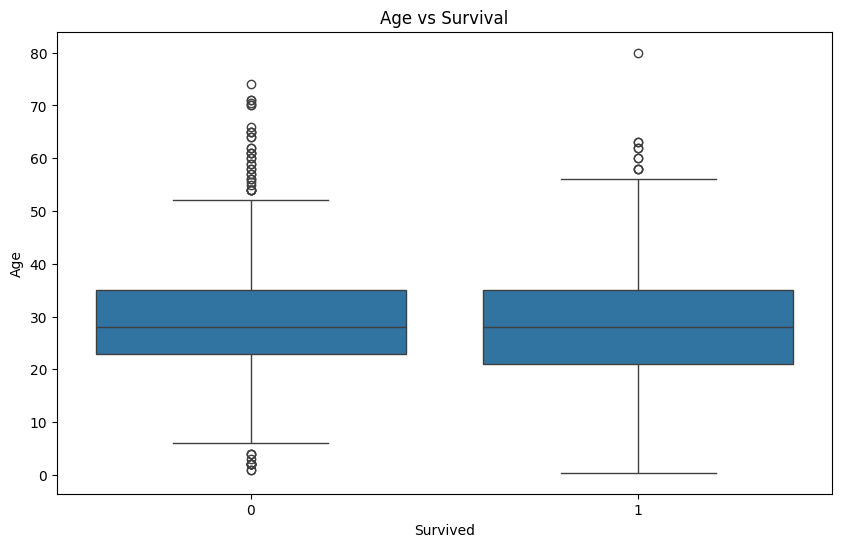

In [13]:
#  علاقة Age مع Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

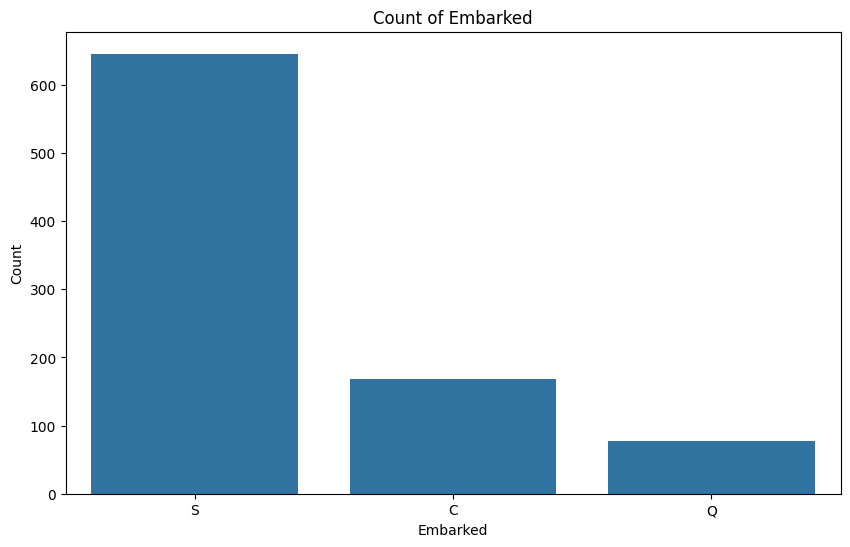

In [14]:
#رسم العلاقة بين Embarked و Survived هي معرفة كيف كان تأثير مكان الصعود على السفينة على فرص النجاة.
#  توزيع Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Count of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

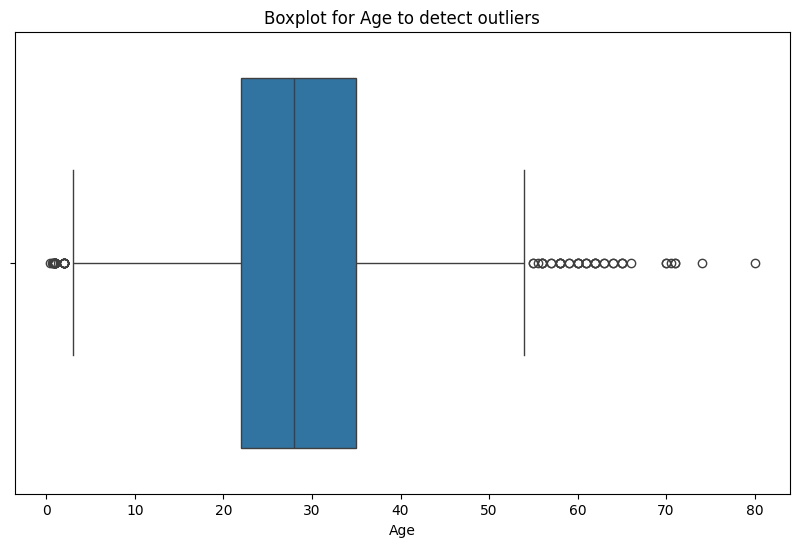

In [15]:
# 5. البحث عن Outliers (قيم غير طبيعية) في العمود Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age to detect outliers')
plt.show()

In [16]:
# إزالة القيم غير الطبيعية في "Age" (أكثر من 100)
df = df[df['Age'] < 100]

# إزالة القيم غير الطبيعية في "Fare" (أكثر من 500)
df = df[df['Fare'] < 500]

In [17]:
# استبدال القيم غير الطبيعية في "Age" بالوسيط
df.loc[df['Age'] > 100, 'Age'] = df['Age'].median()

# استبدال القيم غير الطبيعية في "Fare" بالوسيط
df.loc[df['Fare'] > 500, 'Fare'] = df['Fare'].median()


In [18]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [20]:
# Check if 'Embarked' column exists in the DataFrame
if 'Embarked' not in df.columns:
    print("Error: 'Embarked' column is missing from the DataFrame. Please ensure the dataset is loaded correctly.")

# Perform one-hot encoding for the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q', 'Embarked_S']].astype(int)

In [21]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500       False           0           1  
1      0          PC 17599  71.2833        True           0           0  
2      0  STON/O2. 3101282   7.9250       False           0           1  
3      0            113803  53.1000       False           0           1  
4      0            373450   8.0500       False           0           1

2- Yelp

In [22]:
import pandas as pd

data = pd.read_csv('yelp.csv')

print(data.head())

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [23]:
# عرض معلومات عن الأعمدة وأنواع البيانات
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


In [24]:
# فحص القيم الفريدة في عمود stars
print(data['stars'].unique())

# فحص القيم الفريدة في عمود type
print(data['type'].unique())

# فحص القيم الفريدة في الأعمدة (cool, useful, funny)
print(data[['cool', 'useful', 'funny']].describe())

[5 4 2 3 1]
['review']
               cool        useful         funny
count  10000.000000  10000.000000  10000.000000
mean       0.876800      1.409300      0.701300
std        2.067861      2.336647      1.907942
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      1.000000      0.000000
75%        1.000000      2.000000      1.000000
max       77.000000     76.000000     57.000000


In [25]:
# فحص القيم المفقودة في البيانات
print(data.isnull().sum())

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64


In [26]:
#: هنا بنعرض توزيع التقييمات (من 1 ل 5 نجوم) باستخدام رسم بياني شريطي.

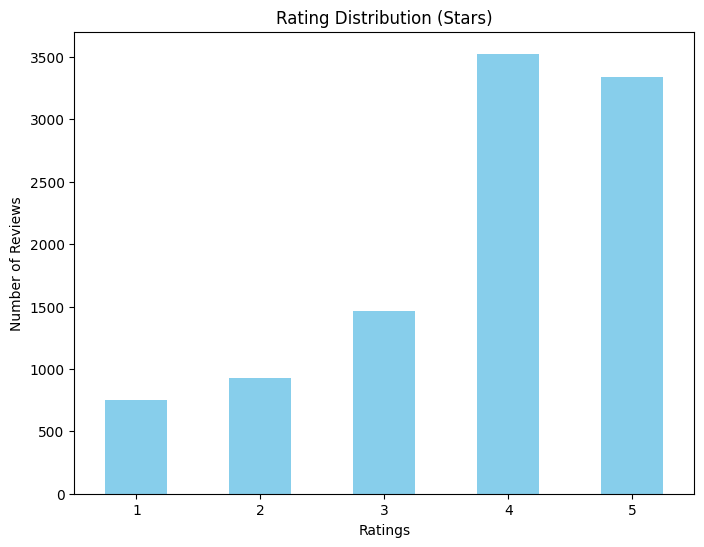

In [27]:
# Distribution of ratings (stars)
stars_counts = data['stars'].value_counts().sort_index()

# Plot the distribution in a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
stars_counts.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution (Stars)')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# بنعرض توزيع التفاعل مع المراجعات (cool, useful, funny) باستخدام رسم بياني دائري

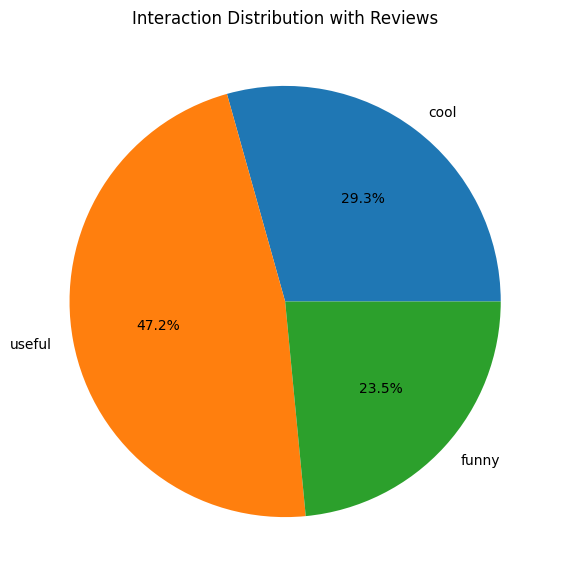

In [28]:
# Total interactions with reviews
interaction_counts = data[['cool', 'useful', 'funny']].sum()

# Pie chart for interactions with reviews
interaction_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Interaction Distribution with Reviews')
plt.ylabel('')
plt.show()


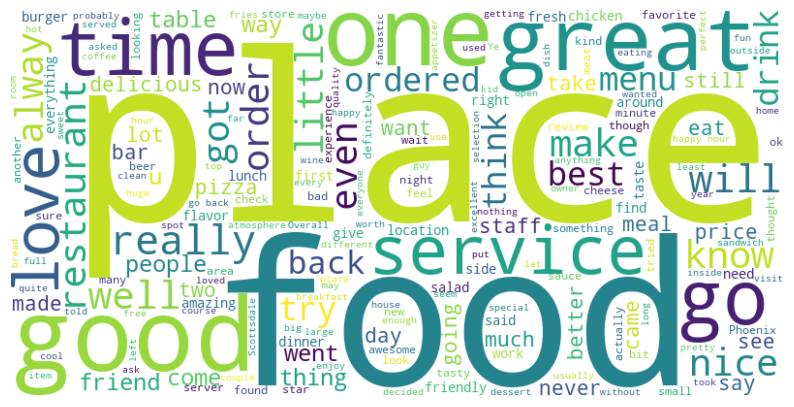

In [29]:
#بنعرض سحابة الكلمات لتحديد الكلمات الأكثر استخدامًا في النصوص عبر المراجعات.

from wordcloud import WordCloud

# Combine all text into a single string
text_data = ' '.join(data['text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#هدفنا نعرف مين أكتر ناس كاتبة مراجعات ونعرضهم في رسم بياني بسيط.
top_users = data['user_id'].value_counts().head(10)


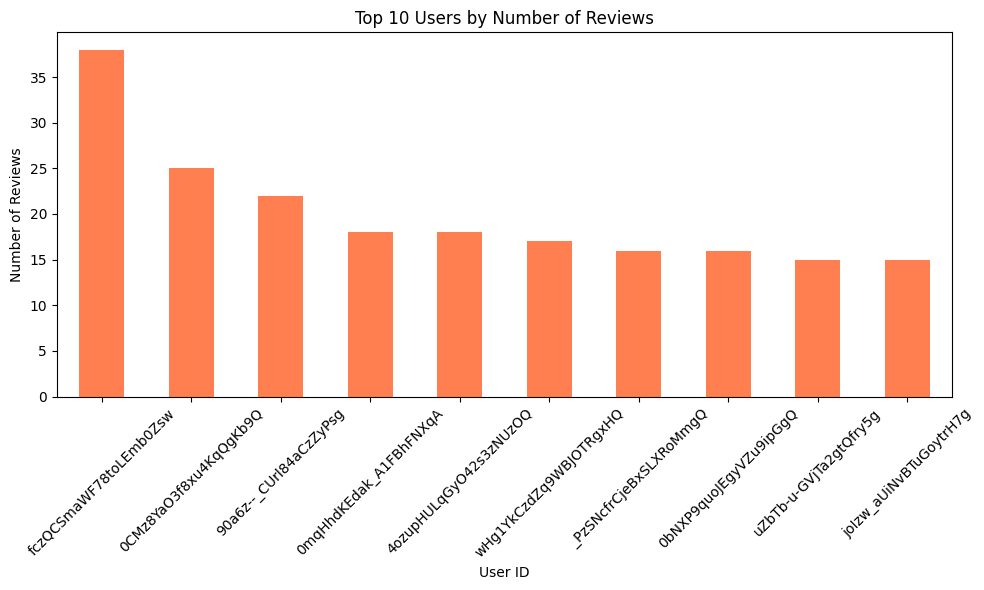

In [31]:
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='coral')
plt.title('Top 10 Users by Number of Reviews')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
#  نشوف الناس اللي بتكتب كتير، بيدوا تقييم عالي ولا قليل

# نضيف عمود جديد يمثل عدد الكلمات في كل review
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

In [33]:
# نحسب المتوسط لكل قيمة من قيم stars
avg_words_per_star = data.groupby('stars')['word_count'].mean()

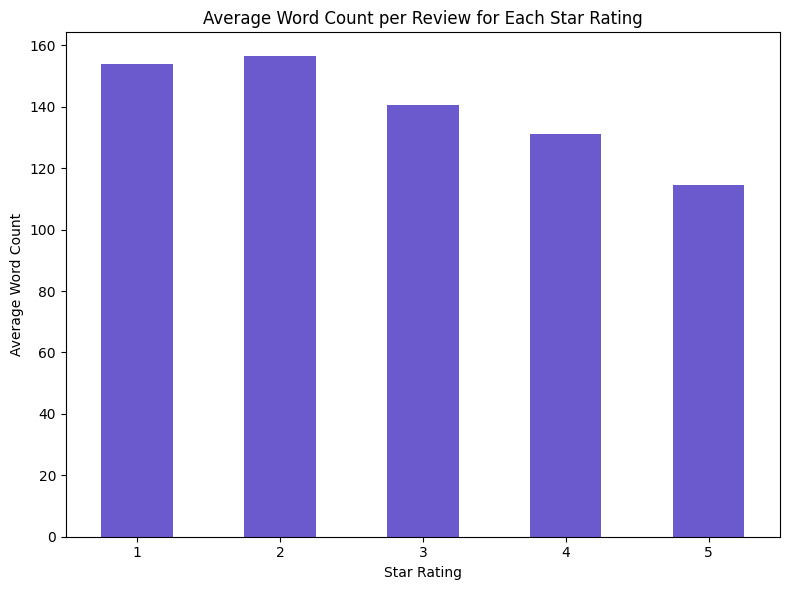

In [34]:
plt.figure(figsize=(8, 6))
avg_words_per_star.plot(kind='bar', color='slateblue')
plt.title('Average Word Count per Review for Each Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3- Case Study - what's in a job description?

1. Asking an Interesting Question
---> What are the most demanding skills in job descriptions?  ما هي المهارات الأكثر طلبًا في الأوصاف الوظيفية

2.  Obtaining the data

In [35]:
import pandas as pd

df = pd.read_csv('job_title_des.csv')
df.head()


Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...

 3. Exploring the data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB


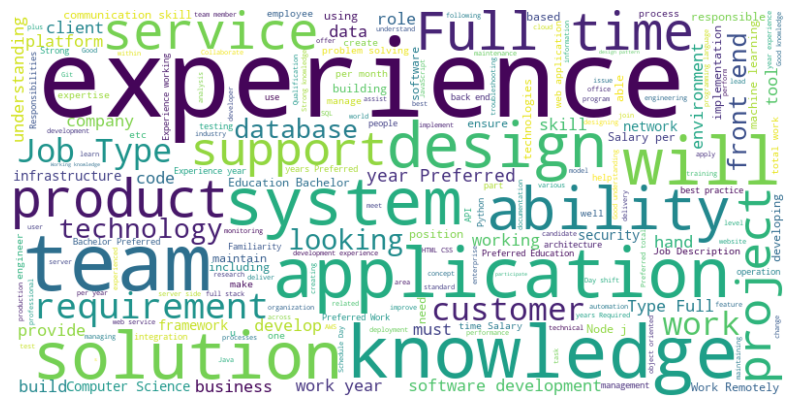

In [37]:
# هنحتاج نعمل تحليل النصوص لاستخراج الكلمات الأكثر تكرارًا من الأوصاف الوظيفية. هنستخدم سحابة الكلمات (Word Cloud) عشان نعرض الكلمات الأكثر شيوعًا
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# دمج كل الأوصاف في نص واحد
text_data = ' '.join(df['Job Description'].dropna())

# إنشاء سحابة الكلمات
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# عرض سحابة الكلمات
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

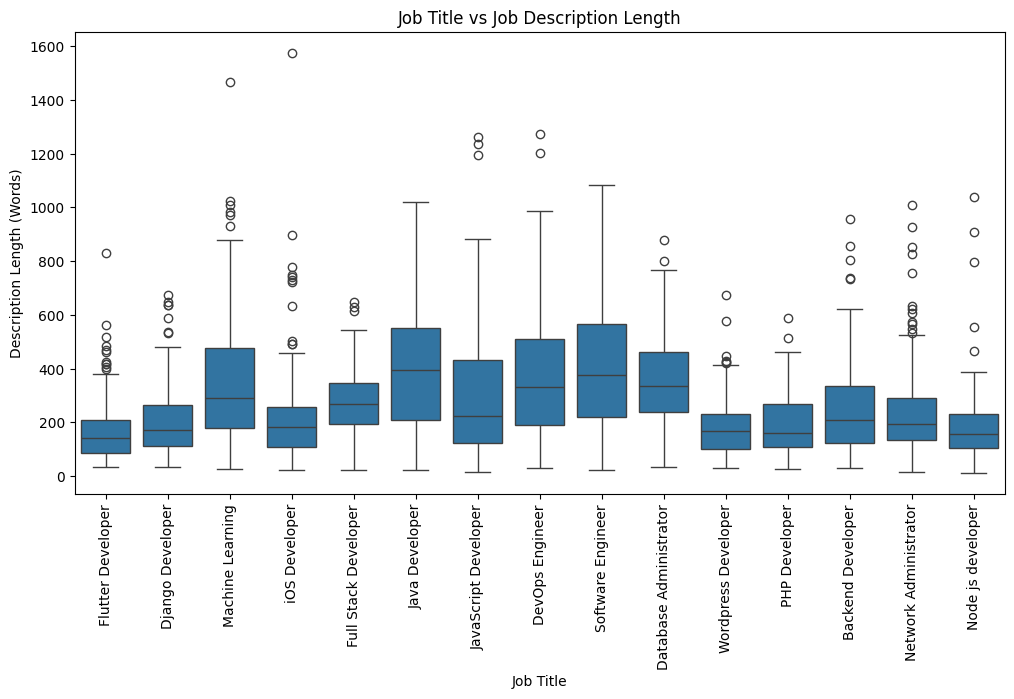

In [38]:
# نعرض العلاقة بين طول الأوصاف الوظيفية (عدد الكلمات) مع الألقاب الوظيفية

import seaborn as sns
import matplotlib.pyplot as plt

# حساب طول الأوصاف الوظيفية
df['Description_Length'] = df['Job Description'].apply(lambda x: len(str(x).split()))

# رسم العلاقة بين الألقاب الوظيفية وطول الأوصاف
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Job Title', y='Description_Length')
plt.title("Job Title vs Job Description Length")
plt.xlabel("Job Title")
plt.ylabel("Description Length (Words)")
plt.xticks(rotation=90)
plt.show()

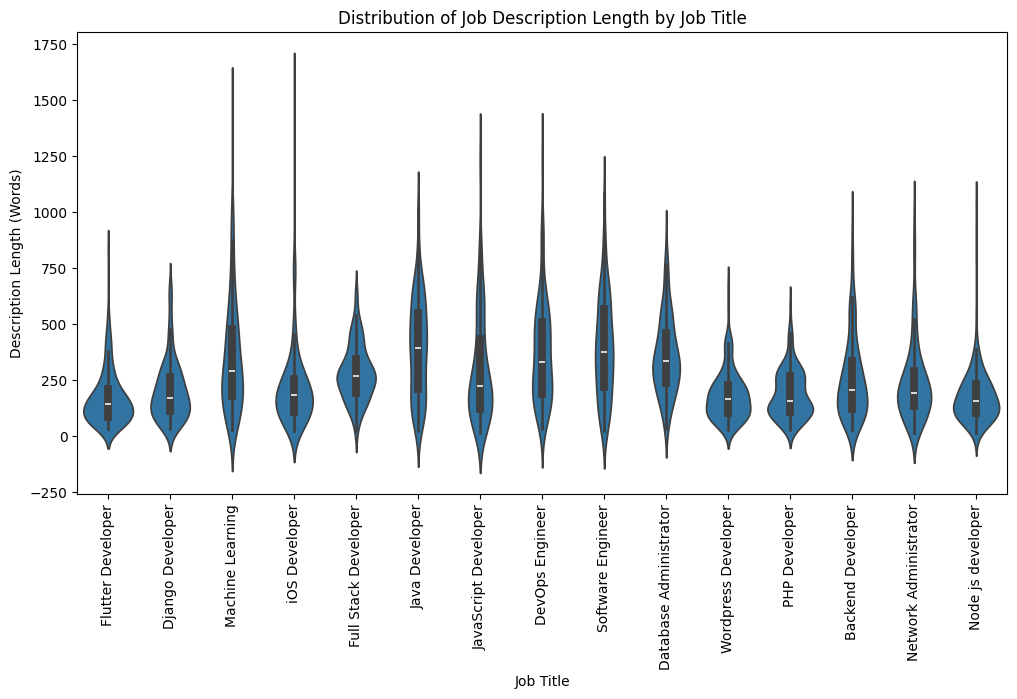

In [39]:
#توزيع الألقاب الوظيفية مع طول الأوصاف باستخدام الرسم البياني للخطوط

# رسم العلاقة بين الألقاب الوظيفية وطول الأوصاف باستخدام رسم بياني
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Job Title', y='Description_Length')
plt.title("Distribution of Job Description Length by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Description Length (Words)")
plt.xticks(rotation=90)
plt.show()

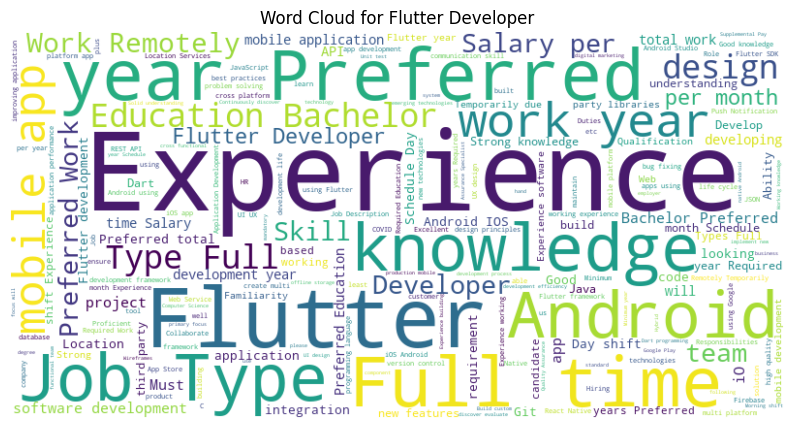

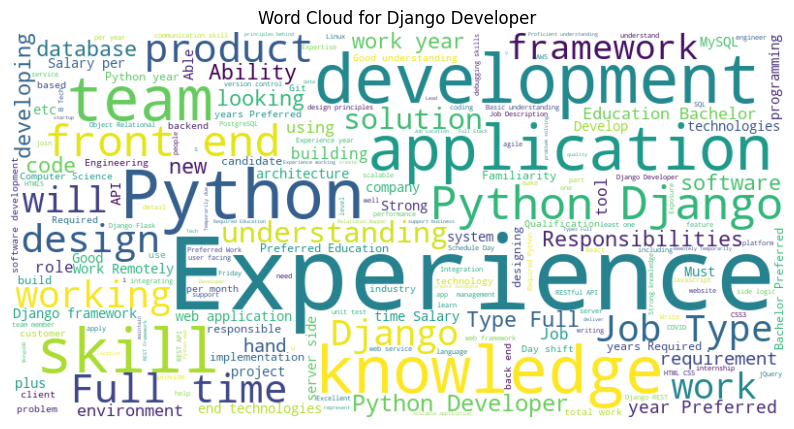

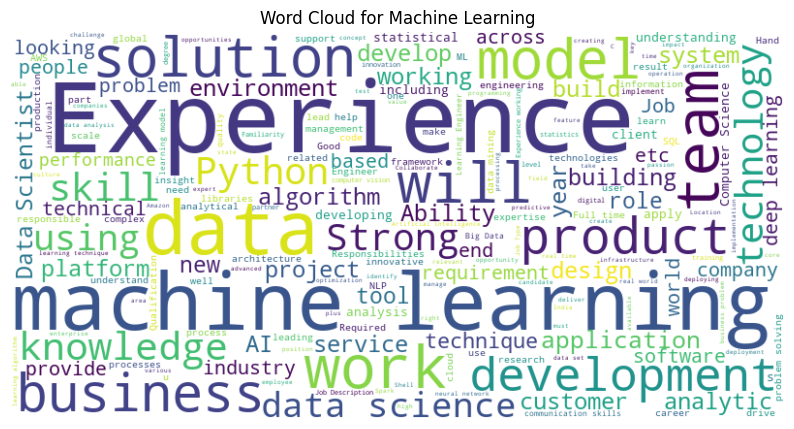

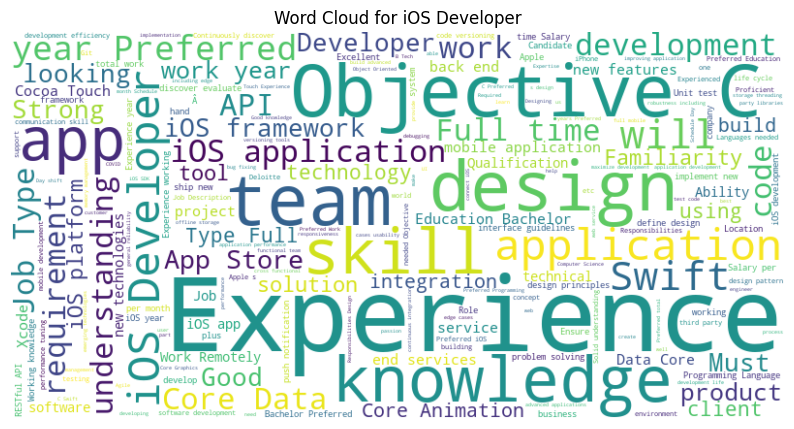

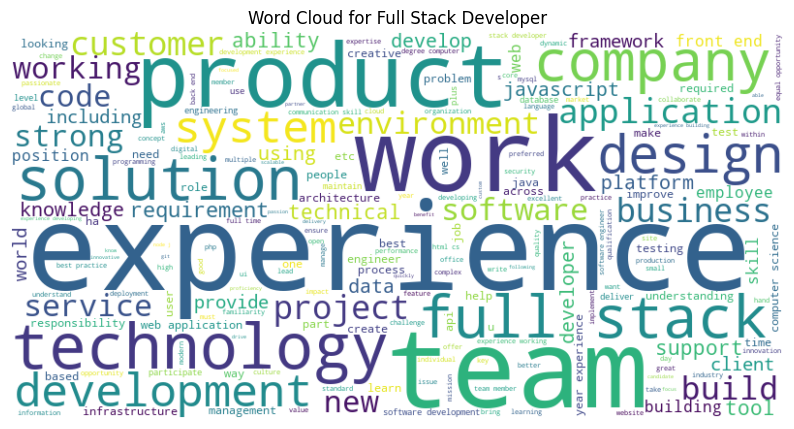

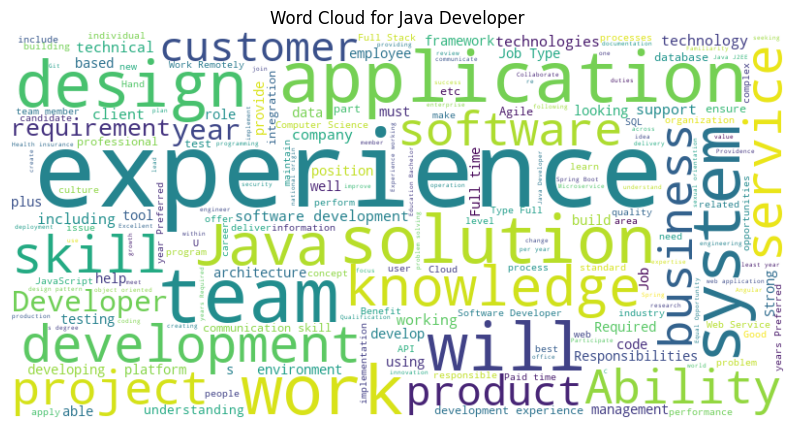

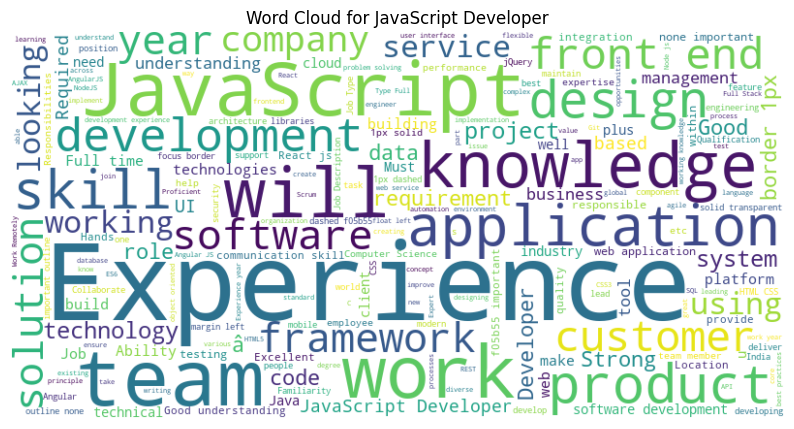

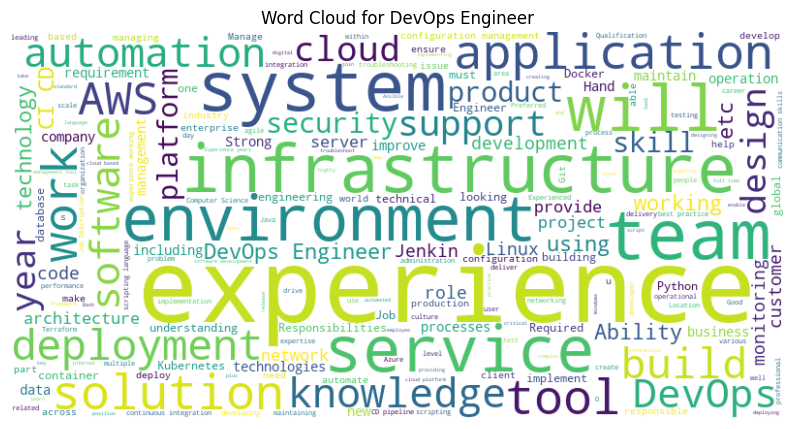

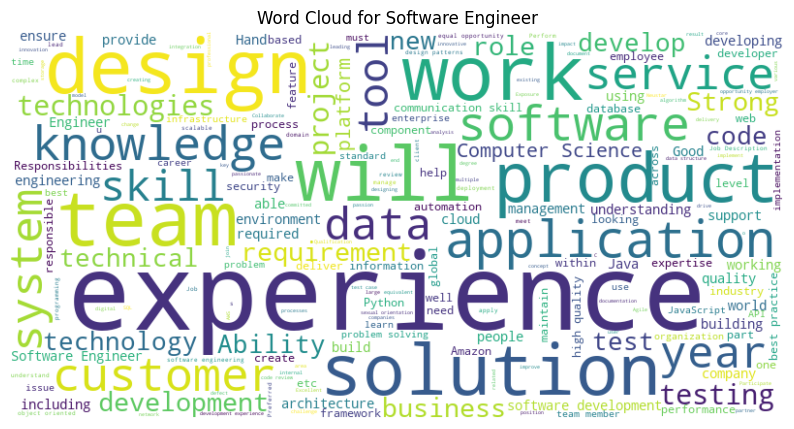

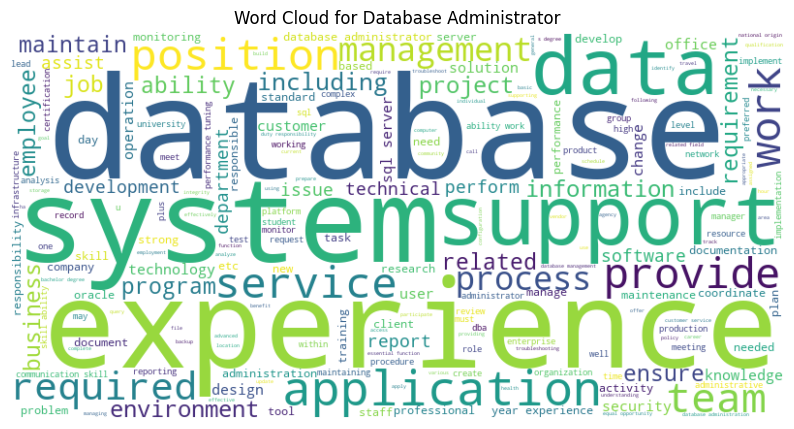

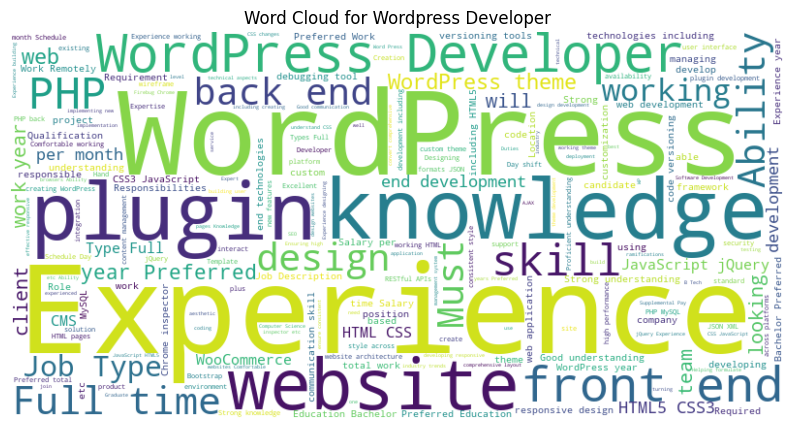

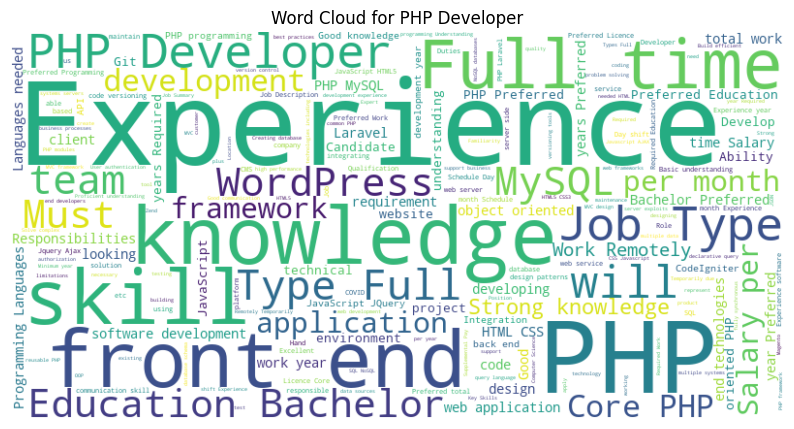

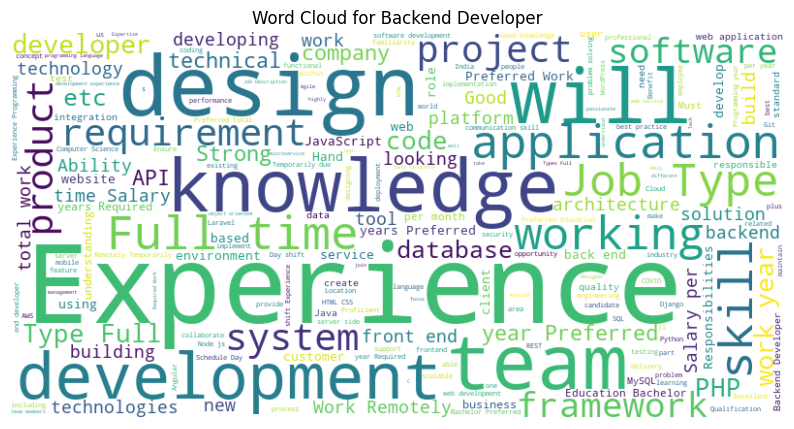

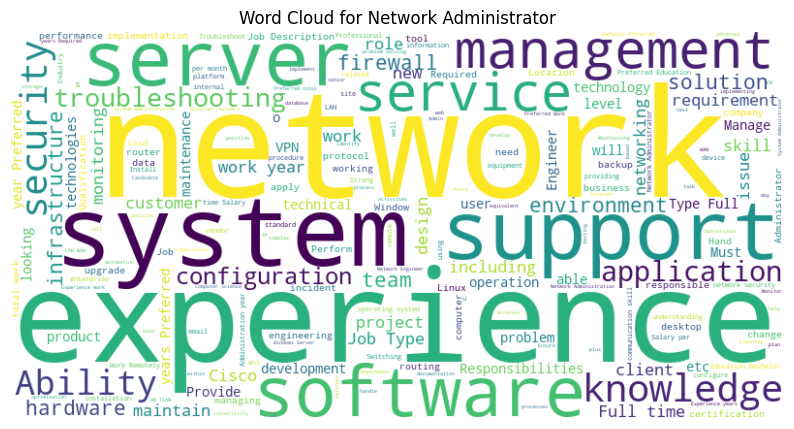

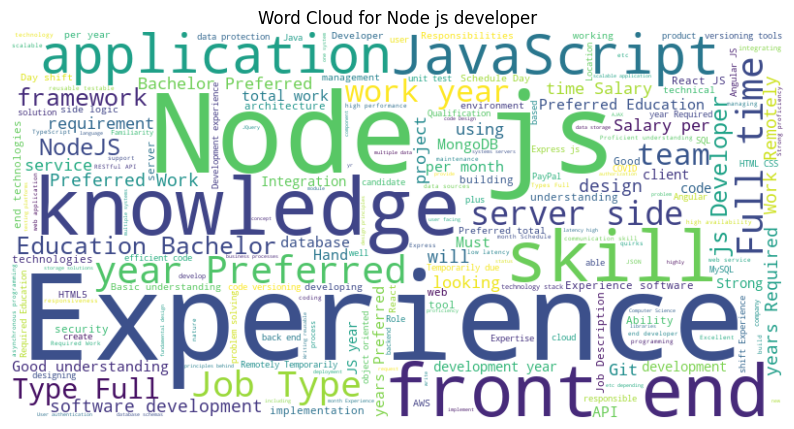

In [40]:
# إنشاء سحابة كلمات لكل لقب وظيفي على حدة لمعرفة الكلمات الأكثر شيوعًا في أوصاف كل لقب وظيفي. نبدأ أولًا بتجميع النصوص الخاصة بكل لقب وظيفي.
# تجميع الأوصاف الوظيفية لكل لقب وظيفي
job_titles = df['Job Title'].unique()

# إنشاء سحابة كلمات لكل لقب وظيفي
for title in job_titles:
    title_data = ' '.join(df[df['Job Title'] == title]['Job Description'].dropna())
    
    # إنشاء سحابة الكلمات لكل لقب
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_data)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {title}")
    plt.show()

In [41]:
#نعرض الكلمات الأكثر شيوعًا المرتبطة بالألقاب الوظيفية بشكل منظم. يمكننا استخدام Counter لعد الكلمات الأكثر تكرارًا.

from collections import Counter
import string

# إزالة علامات الترقيم من النصوص
df['Job Description Clean'] = df['Job Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# تجميع الكلمات الأكثر شيوعًا عبر الألقاب الوظيفية
all_words = ' '.join(df['Job Description Clean'].dropna()).split()
word_counts = Counter(all_words)

# عرض أكثر الكلمات تكرارًا
common_words = word_counts.most_common(10)
print(common_words)

[('and', 27561), ('to', 12887), ('of', 12408), ('the', 10343), ('in', 9590), ('with', 8246), ('a', 6841), ('for', 5453), ('experience', 5163), ('Experience', 4383)]


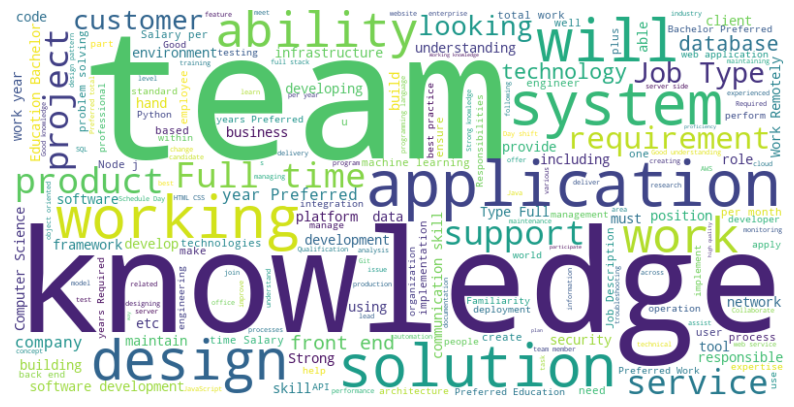

In [42]:
from wordcloud import STOPWORDS

# إضافة الكلمات الشائعة الخاصة بك إذا كنت ترغب
custom_stopwords = set(STOPWORDS).union(set(['and', 'to', 'of', 'the', 'in', 'with', 'a', 'for', 'experience', 'Experience']))

# إنشاء سحابة الكلمات مع استبعاد الكلمات الشائعة
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text_data)

# عرض سحابة الكلمات
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
from wordcloud import WordCloud, STOPWORDS

# إضافة كلمات شائعة إلى مجموعة الكلمات الشائعة
custom_stopwords = set(STOPWORDS).union(set(['and', 'to', 'of', 'the', 'in', 'with', 'a', 'for', 'experience', 'Experience']))

# إنشاء سحابة الكلمات مع استبعاد الكلمات الشائعة
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text_data)

# الحصول على الكلمات الأكثر تكرارًا في السحابة
word_frequencies = wordcloud.process_text(text_data)

# عرض أكثر الكلمات تكرارًا
top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_words)

[('team', 1938), ('knowledge', 1648), ('application', 1487), ('system', 1361), ('will', 1331), ('working', 1307), ('solution', 1293), ('design', 1203), ('ability', 1148), ('work', 1141)]


4. Modeling the data

In [44]:
# بعد التدريب، يتم التنبؤ بالألقاب الوظيفية للمجموعة الاختبارية، ثم يتم تقييم النموذج باستخدام دقة التصنيف (accuracy) و تقرير التصنيف

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# تجهيز البيانات
df = df.dropna(subset=['Job Description'])  # إزالة الصفوف التي تحتوي على أوصاف فارغة
X = df['Job Description']  # الأوصاف الوظيفية
y = df['Job Title']  # الألقاب الوظيفية كهدف (المسمى الوظيفي)

# تحويل النصوص إلى تمثيلات رقمية باستخدام TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X_transformed = vectorizer.fit_transform(X)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# بناء نموذج Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# التنبؤ بالفئات على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# عرض تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.67

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.29      0.11      0.16        47
Database Administrator       0.98      0.98      0.98        43
       DevOps Engineer       0.70      0.66      0.68        50
      Django Developer       0.71      0.74      0.72        39
     Flutter Developer       0.53      0.65      0.58        48
  Full Stack Developer       0.86      0.98      0.92        45
        Java Developer       0.72      0.32      0.44        56
  JavaScript Developer       0.67      0.48      0.56        60
      Machine Learning       0.83      0.81      0.82        43
 Network Administrator       0.77      0.82      0.79        33
     Node js developer       0.71      0.76      0.73        49
         PHP Developer       0.70      0.86      0.78        44
     Software Engineer       0.30      0.68      0.42        41
   Wordpress Developer       0.69      0.71      0.70        34


 5. Communicating and visualizing the results

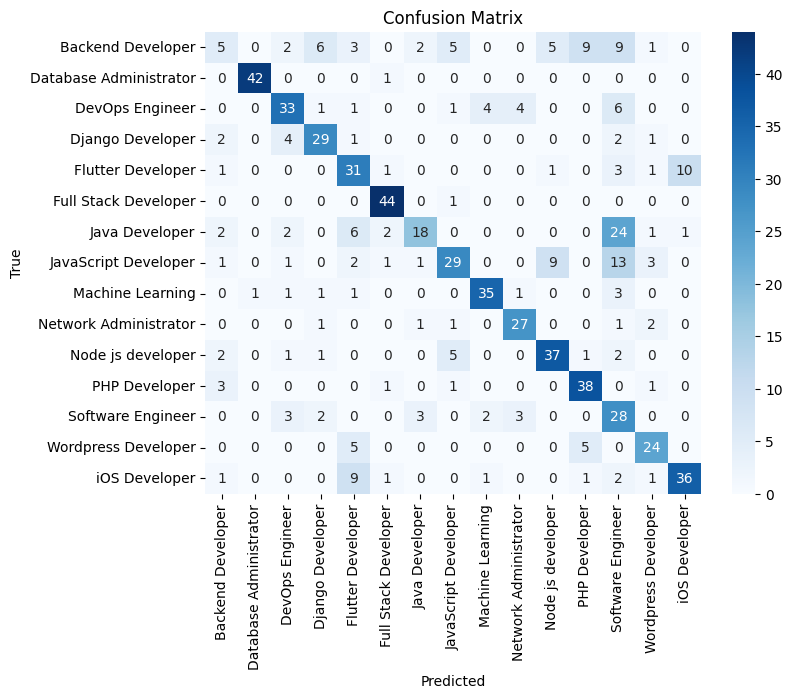

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# رسم المصفوفة الالتباسية باستخدام seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

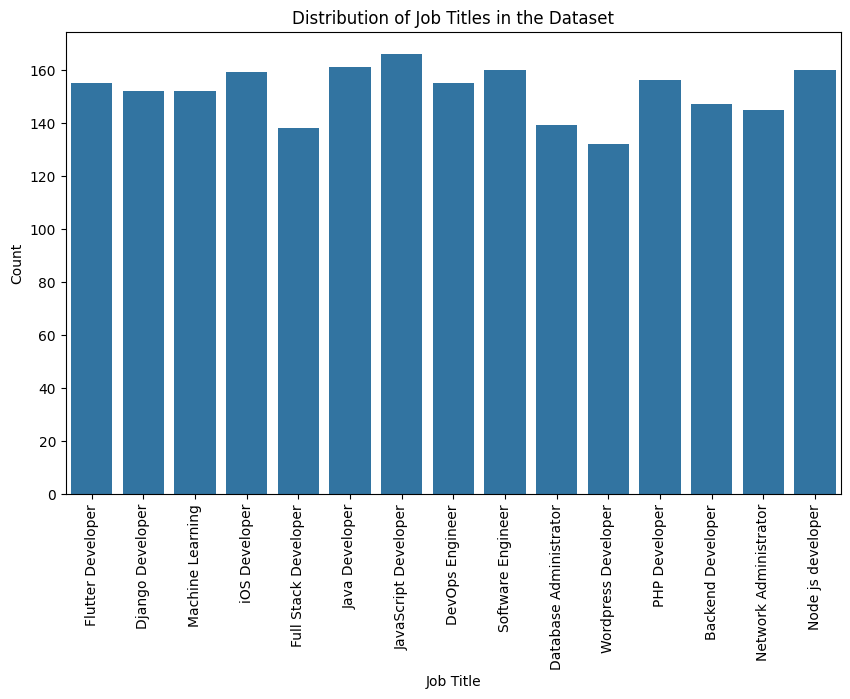

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Title', data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Job Titles in the Dataset")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()